# created by hussainatphysics@gmail.com(hussainsha syed)
here we perfom random forest regression and we also do decission tree, Linear and polynomial regression to conclude which is better

#  Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading data

In [2]:
loadData = pd.read_csv("C:\\Users\\HussainSha\\ML_forGithub\\random_forest\\Random_forest.csv")

In [3]:
x = loadData.drop("Marks", axis='columns')

In [4]:
y = loadData.drop('Hours of Study', axis = 'columns')

# Visualization for the actaul data

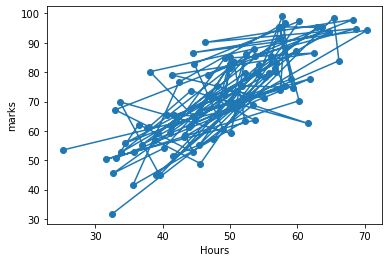

In [6]:
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('Hours')
plt.ylabel('marks')
plt.show()

# spliting data as training data and testing data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=0)

# Training and predicting: random forest

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
ran_reg = RandomForestRegressor(n_estimators=10, random_state=0)

In [11]:
ran_reg.fit(xtrain, ytrain)

<ipython-input-11-8c87fc5e895b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran_reg.fit(xtrain, ytrain)


RandomForestRegressor(n_estimators=10, random_state=0)

In [12]:
pred = ran_reg.predict(xtest)

# comparing real and actual values

In [13]:
ytest.reset_index(drop=True, inplace=True)

In [14]:
df_pred = pd.DataFrame(pred)

In [16]:
pd.concat([ytest, df_pred], axis='columns')

,Marks,0
0,95.455053,89.100920
1,69.588898,75.464831
2,62.562382,81.266461
3,71.139728,79.673542
4,86.642020,66.910892
5,90.123572,71.948788
6,82.892504,64.427147
7,57.812513,63.035794
8,73.434642,75.464831
9,81.536991,82.207094


# Visualizing predicted graph 

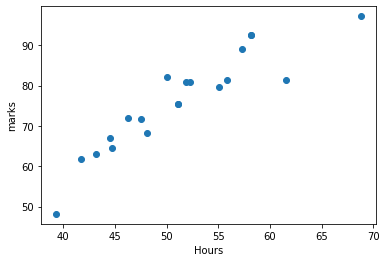

In [18]:
plt.scatter(xtest,df_pred)
# plt.plot(xtest,df_pred)
plt.xlabel('Hours')
plt.ylabel('marks')
plt.show()

# RMSE and Score

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
print("RMSE of random forest is:", np.sqrt(mean_squared_error(ytest, df_pred)))

RMSE of random forest is: 11.496852129824092


In [21]:
ran_reg.score(xtest, ytest)

0.1360939306245572

# decission tree

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
dec_reg = DecisionTreeRegressor()

In [24]:
dec_reg.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [25]:
dec_pred = dec_reg.predict(xtest)

In [26]:
print("RMSE of Decission tree is:", np.sqrt(mean_squared_error(ytest, dec_pred)))

RMSE of Decission tree is: 13.89450359457128


In [27]:
dec_reg.score(xtest, ytest)

-0.2618121499444841

# Polynomial

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
pol_reg = PolynomialFeatures()

In [30]:
x_ = pol_reg.fit_transform(xtrain)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lin_reg = LinearRegression()

In [33]:
lin_reg.fit(x_, ytrain)

LinearRegression()

In [37]:
x_test = pol_reg.fit_transform(xtest)

In [38]:
pol_pred = lin_reg.predict(x_test)

In [40]:
print("RMSE of Polynomial regression is :", np.sqrt(mean_squared_error(ytest, pol_pred)))

RMSE of Polynomial regression is : 11.818122662571893


In [41]:
lin_reg.score(x_test, ytest)

0.08713696663737036

# Linear reg

In [42]:
lin_reg.fit(xtrain, ytrain)

LinearRegression()

In [43]:
lin_pred = lin_reg.predict(xtest)

In [44]:
print("RMSE of Linear regression is :", np.sqrt(mean_squared_error(ytest, lin_pred)))

RMSE of Linear regression is : 11.724690468814678


In [47]:
lin_reg.score(xtest, ytest)

0.10151380981544511

#  though scores are very less for this dataset, still random forest is much better than dccission tree, polynomial, linear regression after comparing RMSE and Score with each other